<a href="https://colab.research.google.com/github/cheikhsaliou01/-3/blob/main/Premier_ModelDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importation des librairies
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

In [4]:
# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Toutees bases
#https://keras.io/api/datasets/

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_test.shape


(10000, 28, 28)

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
np.min(X_train),np.max(X_train)

(0, 255)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

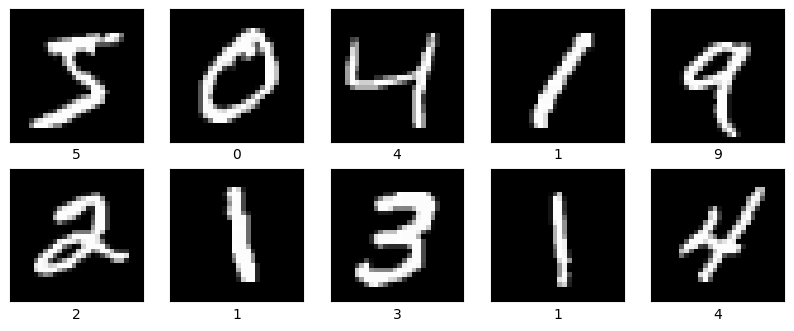

In [9]:
# prompt: Afficher 10 imags du datasets

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(y_train[i])
plt.show()


In [10]:
# prompt: normaliser les donnes

X_train, X_test = X_train / 255.0, X_test / 255.0
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical
# Les étiquettes sont converties en vecteurs binaires.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_train.shape


(60000, 10)

In [14]:
# prompt: construction de modele de reseau de neurone

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# prompt: compilation du modele

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
# prompt: Entrainer le model

model.fit(X_train, y_train, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.3368 - accuracy: 0.9051
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1627 - accuracy: 0.9532
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1187 - accuracy: 0.9651
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0922 - accuracy: 0.9731
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0747 - accuracy: 0.9782


In [18]:
# prompt: Evaluation du model

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9733
Test accuracy: 0.9732999801635742


313/313 [==============================] - 2s 4ms/step


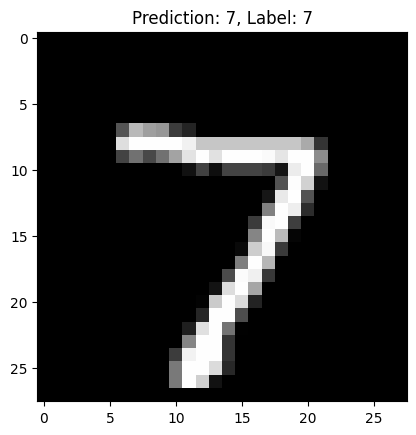

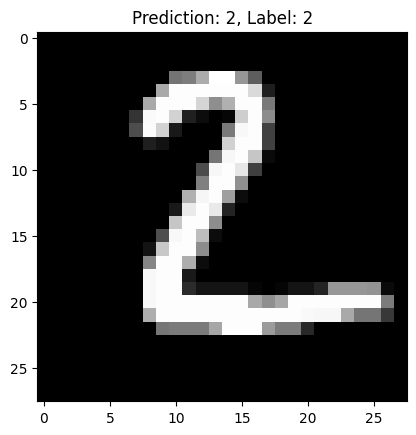

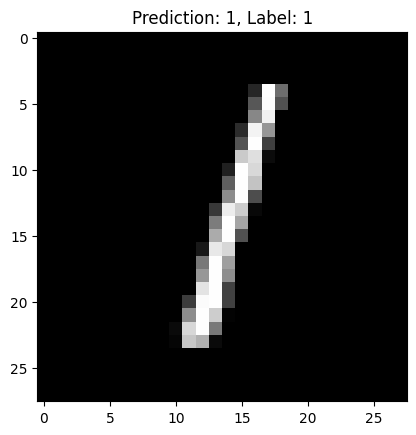

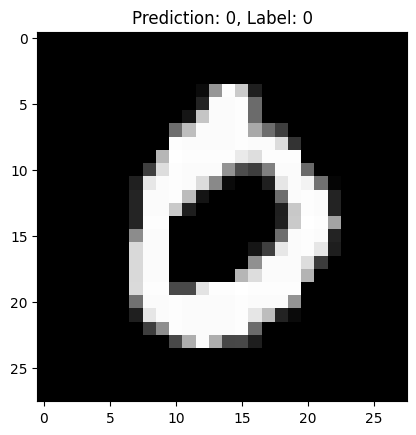

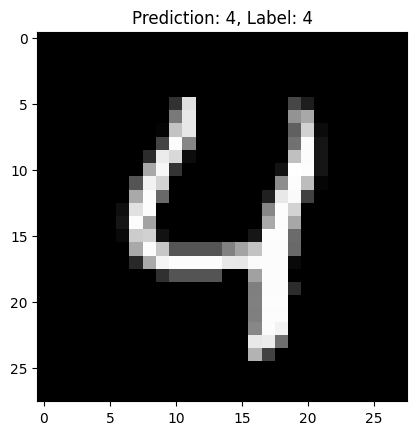

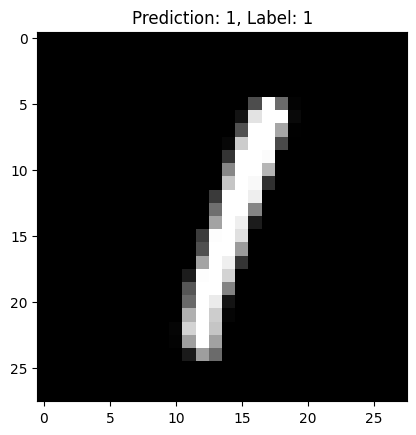

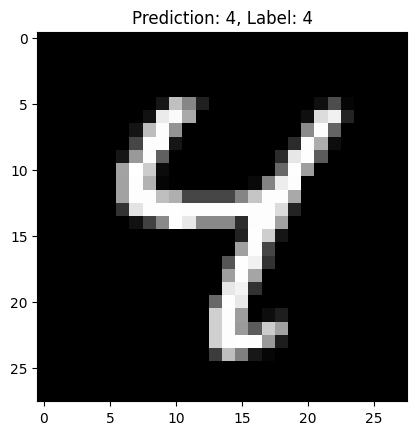

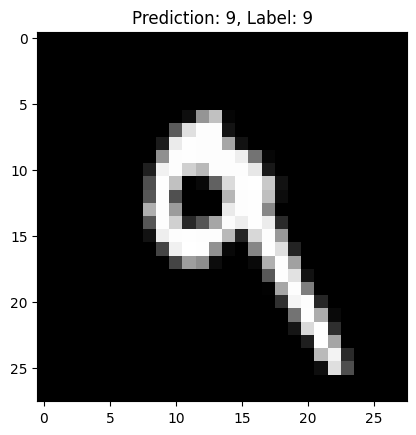

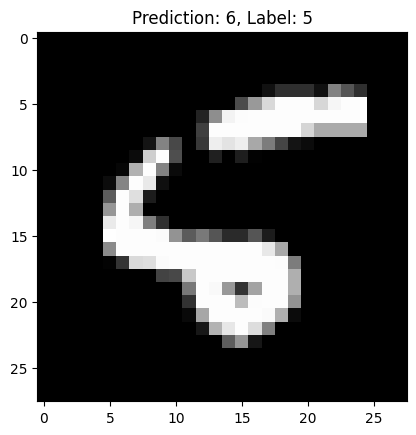

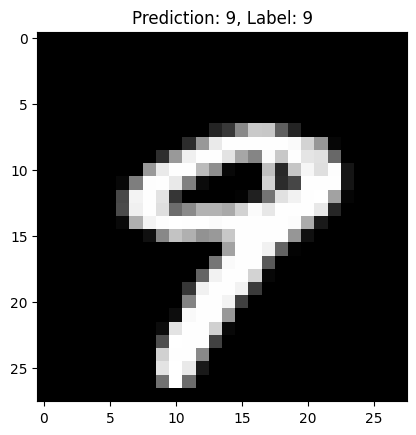

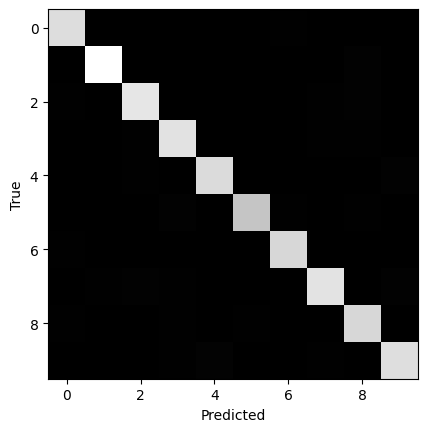

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [19]:
# prompt: visualisation des performances de l'environnement

import matplotlib.pyplot as plt
import numpy as np
# Visualisation des performances de l'environnement

# Prédictions du modèle sur l'ensemble de test
predictions = model.predict(X_test)

# Affichage des 10 premières prédictions
for i in range(10):
    plt.imshow(X_test[i], cmap="gray")
    plt.title("Prediction: {}, Label: {}".format(np.argmax(predictions[i]), np.argmax(y_test[i])))
    plt.show()

# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

# Affichage de la matrice de confusion
plt.imshow(cm, cmap="gray")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Rapport de classification
from sklearn.metrics import classification_report
report = classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

# Affichage du rapport de classification
print(report)


Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0833 - val_accuracy: 0.9773
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0851 - val_accuracy: 0.9782
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0839 - val_accuracy: 0.9772
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0886 - val_accuracy: 0.9775
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.0931 - val_accuracy: 0.9777
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0203 - accuracy: 0.9939 - val_loss: 0.0944 - val_accuracy: 0.9786
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0191 - accuracy: 0.9947 - val_loss: 0.0939 - val_accuracy:

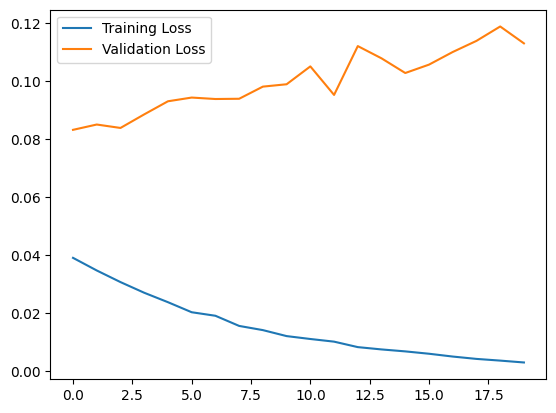

In [28]:
# Visualisation des performances de l'entraînement
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
